In [1]:
import pandas as pd
df=pd.read_csv(r"F:\dataset_education\final_clean_dataset.csv")
df.head()

,Table Name,State Code,Distt Code,State Name,Area,Age,Total Person,Total Males,Total Females,Illiterate Person,...,Technical diploma Person,Technical diploma Males,Technical diploma Females,Graduate Person,Graduate Males,Graduate Females,Unclassified Person,Unclassified Males,Unclassified Females,Year
0,C2508SC,1,0,JAMMU & KASHMIR,Total,0-6,117040,61617,55423,117040,...,0,0,0,0,0,0,0,0,0,1991
1,C2508SC,1,0,JAMMU & KASHMIR,Total,7,17792,9283,8509,7220,...,0,0,0,0,0,0,1,0,1,1991
2,C2508SC,1,0,JAMMU & KASHMIR,Total,8,21287,11006,10281,6047,...,0,0,0,0,0,0,0,0,0,1991
3,C2508SC,1,0,JAMMU & KASHMIR,Total,9,17014,8904,8110,3607,...,0,0,0,0,0,0,0,0,0,1991
4,C2508SC,1,0,JAMMU & KASHMIR,Total,10,23446,12335,11111,4328,...,0,0,0,0,0,0,0,0,0,1991


In [2]:
# Overall literacy rate calculation for each year
literacy_rate = (
    df.groupby("Year")
    .apply(lambda x: (x["Literate Person"].sum() / x["Total Person"].sum()) * 100)
    .reset_index(name="Literacy Rate (%)")
)

print(literacy_rate)


   Year  Literacy Rate (%)
0  1991          45.199369
1  2001          54.497735
2  2011          63.052775


C:\Users\ATANU MANNA\AppData\Local\Temp\ipykernel_10036\3615975395.py:4: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: (x["Literate Person"].sum() / x["Total Person"].sum()) * 100)


In [3]:
# Total Literacy Rate across all years
total_literacy_rate = (df["Literate Person"].sum() / df["Total Person"].sum()) * 100

print("Total Literacy Rate: {:.2f}%".format(total_literacy_rate))


Total Literacy Rate: 58.16%


C:\Users\ATANU MANNA\AppData\Local\Temp\ipykernel_10036\1460456389.py:6: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: (x["Literate Person"].sum() / x["Total Person"].sum()) * 100)


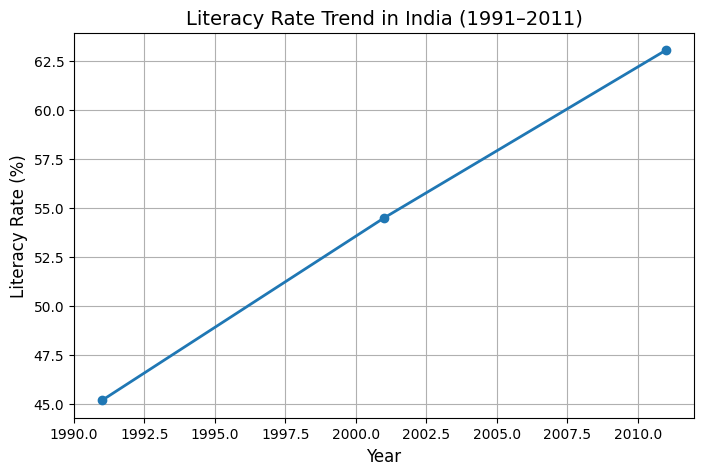

In [4]:
import matplotlib.pyplot as plt

# Calculate literacy rate per year
literacy_rate = (
    df.groupby("Year")
    .apply(lambda x: (x["Literate Person"].sum() / x["Total Person"].sum()) * 100)
    .reset_index(name="Literacy Rate (%)")
)

# Plot trend line
plt.figure(figsize=(8, 5))
plt.plot(literacy_rate["Year"], literacy_rate["Literacy Rate (%)"], marker="o", linestyle="-", linewidth=2)

# Add labels and title
plt.title("Literacy Rate Trend in India (1991–2011)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Literacy Rate (%)", fontsize=12)
plt.grid(True)
plt.show()


In [5]:
# Calculate overall Male Literacy Rate
male_literacy_rate = (df["Literate Males"].sum() / df["Total Males"].sum()) * 100

# Calculate overall Female Literacy Rate
female_literacy_rate = (df["Literate Females"].sum() / df["Total Females"].sum()) * 100

print("Overall Male Literacy Rate: {:.2f}%".format(male_literacy_rate))
print("Overall Female Literacy Rate: {:.2f}%".format(female_literacy_rate))


Overall Male Literacy Rate: 65.94%
Overall Female Literacy Rate: 49.86%


C:\Users\ATANU MANNA\AppData\Local\Temp\ipykernel_10036\3018509616.py:6: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: (x["Literate Males"].sum() / x["Total Males"].sum()) * 100)
C:\Users\ATANU MANNA\AppData\Local\Temp\ipykernel_10036\3018509616.py:13: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: (x["Literate Females"].sum() / x["Total Females"].sum()) * 100)


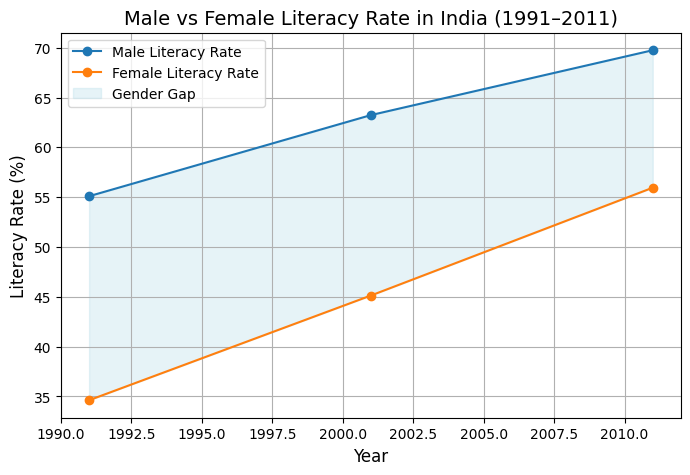

In [6]:
import matplotlib.pyplot as plt

# Calculate male literacy rate per year
male_lit = (
    df.groupby("Year")
    .apply(lambda x: (x["Literate Males"].sum() / x["Total Males"].sum()) * 100)
    .reset_index(name="Male Literacy Rate (%)")
)

# Calculate female literacy rate per year
female_lit = (
    df.groupby("Year")
    .apply(lambda x: (x["Literate Females"].sum() / x["Total Females"].sum()) * 100)
    .reset_index(name="Female Literacy Rate (%)")
)

# Merge for plotting
gender_lit = male_lit.merge(female_lit, on="Year")

# Plot trend lines
plt.figure(figsize=(8,5))
plt.plot(gender_lit["Year"], gender_lit["Male Literacy Rate (%)"], marker="o", label="Male Literacy Rate")
plt.plot(gender_lit["Year"], gender_lit["Female Literacy Rate (%)"], marker="o", label="Female Literacy Rate")

# Plot gap as shaded area
plt.fill_between(
    gender_lit["Year"], 
    gender_lit["Male Literacy Rate (%)"], 
    gender_lit["Female Literacy Rate (%)"], 
    color="lightblue", alpha=0.3, label="Gender Gap"
)

# Labels and title
plt.title("Male vs Female Literacy Rate in India (1991–2011)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Literacy Rate (%)", fontsize=12)
plt.legend()
plt.grid(True)
plt.show()


In [7]:
# Function to calculate literacy rate for each state in a given year
def state_literacy_rate(df):
    return (df["Literate Person"].sum() / df["Total Person"].sum()) * 100

# Group by State and Year
state_lit = (
    df.groupby(["Year", "State Name"])
    .apply(state_literacy_rate)
    .reset_index(name="Literacy Rate (%)")
)

# Sort values within each year
state_lit_sorted = state_lit.sort_values(["Year", "Literacy Rate (%)"], ascending=[True, False])

# Top 10 states each year
top2_states = state_lit_sorted.groupby("Year").head(2)

# Bottom 10 states each year
bottom2_states = state_lit_sorted.groupby("Year").tail(2)

print("📌 Top 2 States by Literacy Rate (each year):")
print(top2_states)

print("\n📌 Bottom 2 States by Literacy Rate (each year):")
print(bottom2_states)


📌 Top 2 States by Literacy Rate (each year):
    Year   State Name  Literacy Rate (%)
21  1991      MIZORAM          81.985294
7   1991  DAMAN & DIU          73.150062
48  2001       KERALA          80.039536
53  2001      MIZORAM          74.439016
80  2011       KERALA          84.223710
73  2011          GOA          79.907511

📌 Bottom 2 States by Literacy Rate (each year):
    Year         State Name  Literacy Rate (%)
14  1991          JHARKHAND          29.904651
3   1991              BIHAR          22.078179
46  2001          JHARKHAND          43.706954
35  2001              BIHAR          37.482091
65  2011  ARUNACHAL PRADESH          55.358102
67  2011              BIHAR          50.436916


C:\Users\ATANU MANNA\AppData\Local\Temp\ipykernel_10036\275596409.py:8: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(state_literacy_rate)


C:\Users\ATANU MANNA\AppData\Local\Temp\ipykernel_10036\250738699.py:15: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(state_literacy_rate)


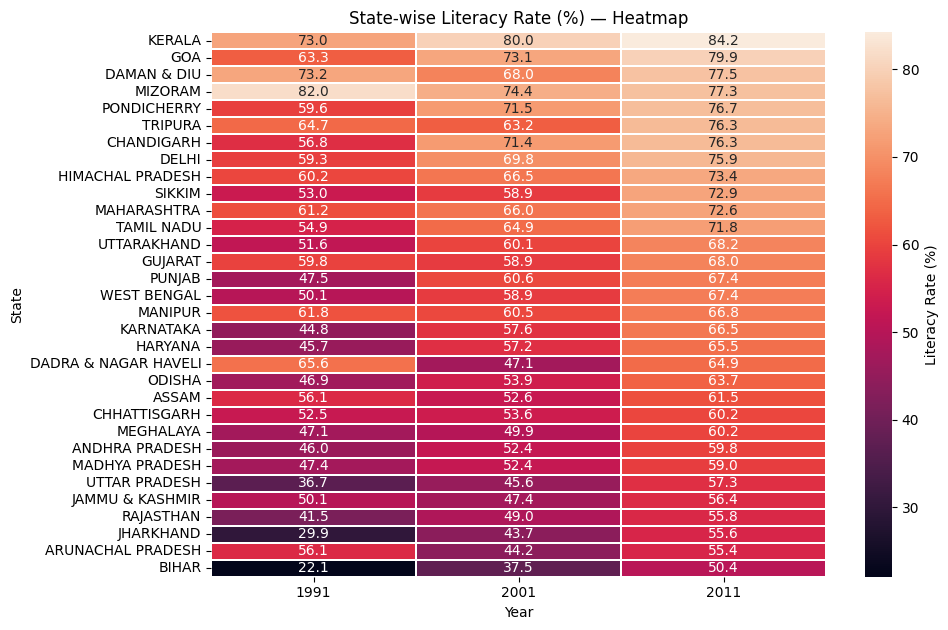

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. compute state-wise literacy rate per year
def state_literacy_rate(group):
    # avoid division by zero
    total = group["Total Person"].sum()
    if total == 0:
        return 0.0
    return (group["Literate Person"].sum() / total) * 100

state_lit = (
    df.groupby(["State Name", "Year"])
      .apply(state_literacy_rate)
      .reset_index(name="Literacy Rate (%)")
)

# 2. pivot to make a matrix: rows = states, cols = years
pivot = state_lit.pivot(index="State Name", columns="Year", values="Literacy Rate (%)")

# optional: sort states by 2011 literacy desc for nicer display (if 2011 exists)
if 2011 in pivot.columns:
    pivot = pivot.sort_values(by=2011, ascending=False)
else:
    pivot = pivot.sort_index()

# 3. plot heatmap
plt.figure(figsize=(10, max(6, 0.2 * pivot.shape[0])))  # height scales with number of states
sns.heatmap(pivot, annot=True, fmt=".1f", linewidths=0.3, cbar_kws={"label": "Literacy Rate (%)"})
plt.title("State-wise Literacy Rate (%) — Heatmap")
plt.xlabel("Year")
plt.ylabel("State")
plt.tight_layout()
plt.show()


In [9]:
df.columns

Index(['Table Name', 'State Code', 'Distt Code', 'State Name', 'Area', 'Age',
       'Total Person', 'Total Males', 'Total Females', 'Illiterate Person',
       'Illiterate Males', 'Illiterate Females', 'Literate Person',
       'Literate Males', 'Literate Females',
       'Literate without educational level Person',
       'Literate without educational level Males',
       'Literate without educational level Females', 'Below primary Person',
       'Below primary Males', 'Below primary Females', 'Primary Person',
       'Primary Males', 'Primary Females', 'Middle Person', 'Middle Males',
       'Middle Females', 'Secondary Person', 'Secondary Males',
       'Secondary Females', 'Higher secondary Person',
       'Higher Secondary Males', 'Higher Secondary Females',
       'Non-technical diploma Person', 'Non-technical diploma Males',
       'Non-technical diploma Females', 'Technical diploma Person',
       'Technical diploma Males', 'Technical diploma Females',
       'Graduate Person

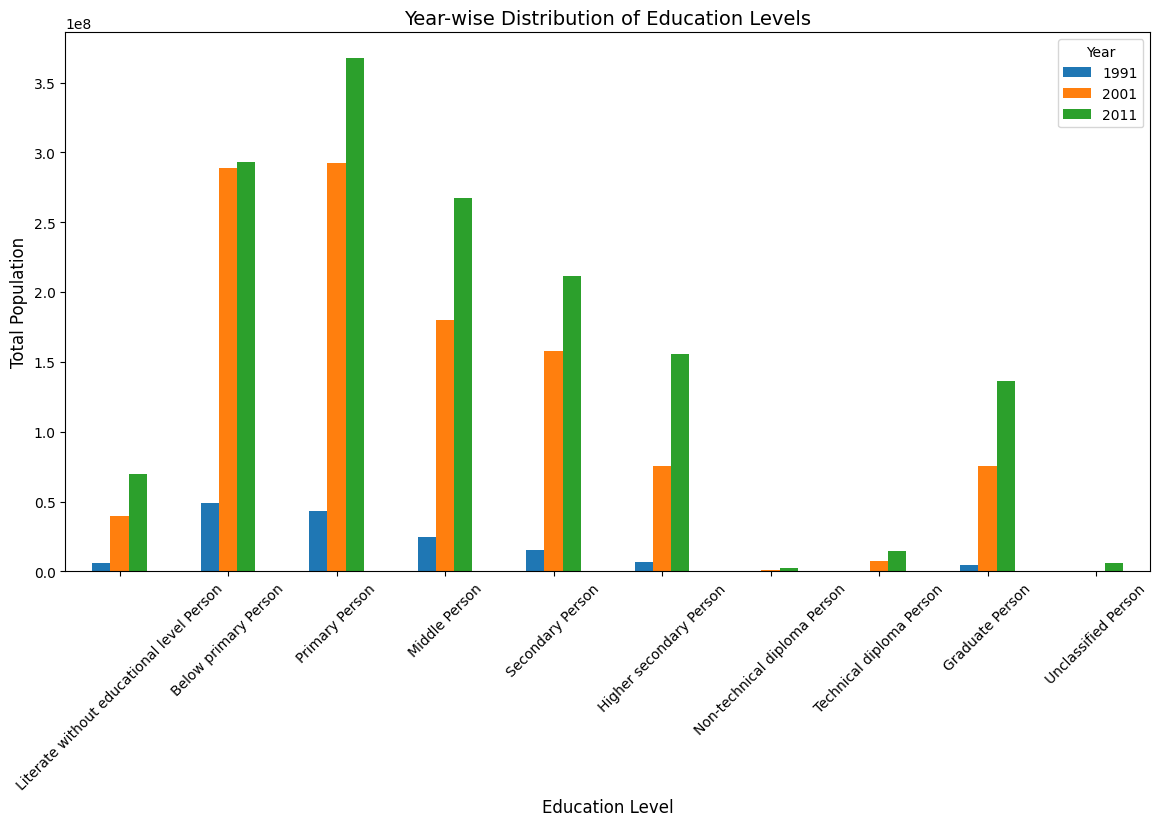

In [10]:
import matplotlib.pyplot as plt

# Select only education-related columns
education_cols = [
    "Literate without educational level Person" ,"Below primary Person" ,"Primary Person",
    "Middle Person", "Secondary Person", "Higher secondary Person",
    "Non-technical diploma Person", "Technical diploma Person",
    "Graduate Person", "Unclassified Person"
]

# Group by Year and sum education columns
edu_distribution_yearly = df.groupby("Year")[education_cols].sum().T  # transpose so education levels on x-axis

# Plot grouped bar chart
edu_distribution_yearly.plot(kind="bar", figsize=(14, 7))

plt.title("Year-wise Distribution of Education Levels", fontsize=14)
plt.xlabel("Education Level", fontsize=12)
plt.ylabel("Total Population", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Year")
plt.show()


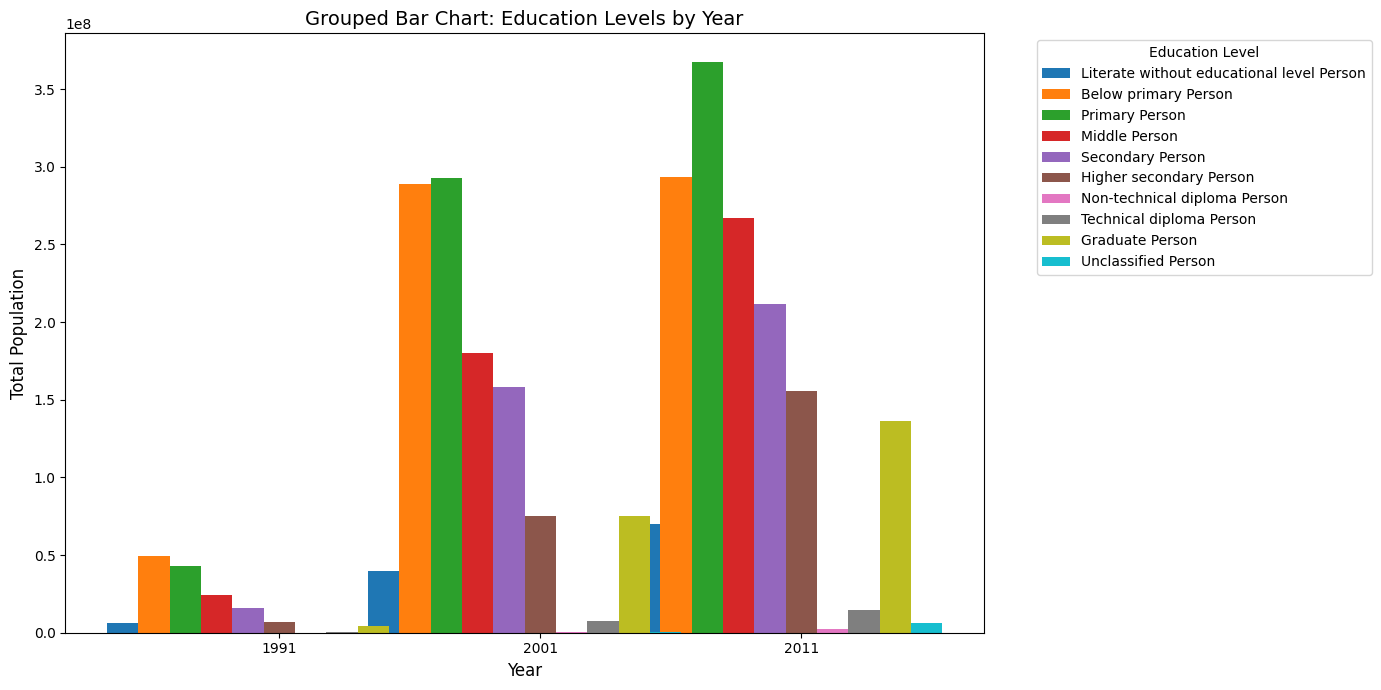

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Select only education-related columns
education_cols = [
    "Literate without educational level Person" ,"Below primary Person" ,"Primary Person",
    "Middle Person", "Secondary Person", "Higher secondary Person",
    "Non-technical diploma Person", "Technical diploma Person",
    "Graduate Person", "Unclassified Person"
]

# Group by Year and sum education columns
edu_distribution_yearly = df.groupby("Year")[education_cols].sum()

# Plot grouped bar chart
fig, ax = plt.subplots(figsize=(14, 7))

bar_width = 0.12  # width of each bar
years = edu_distribution_yearly.index
x = np.arange(len(years))  # positions for groups

# Plot each education level as a separate set of bars
for i, col in enumerate(education_cols):
    ax.bar(x + i*bar_width, edu_distribution_yearly[col], 
           width=bar_width, label=col)

# Formatting
ax.set_title("Grouped Bar Chart: Education Levels by Year", fontsize=14)
ax.set_xlabel("Year", fontsize=12)
ax.set_ylabel("Total Population", fontsize=12)
ax.set_xticks(x + bar_width * (len(education_cols) / 2))
ax.set_xticklabels(years)
ax.legend(title="Education Level", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [12]:
import plotly.express as px

# Define education stages in sequential order
education_path = [
    "Below primary Person",
    "Primary Person",
    "Middle Person",
    "Secondary Person",
    "Higher secondary Person",
    "Non-technical diploma Person",
    "Technical diploma Person",
    "Graduate Person"
]

# Aggregate totals for each stage
funnel_data = df[education_path].sum().reset_index()
funnel_data.columns = ["Education Level", "Population"]

# Create funnel chart
fig = px.funnel(funnel_data, 
                x="Population", 
                y="Education Level",
                title="Education Drop-off Funnel")

fig.show()


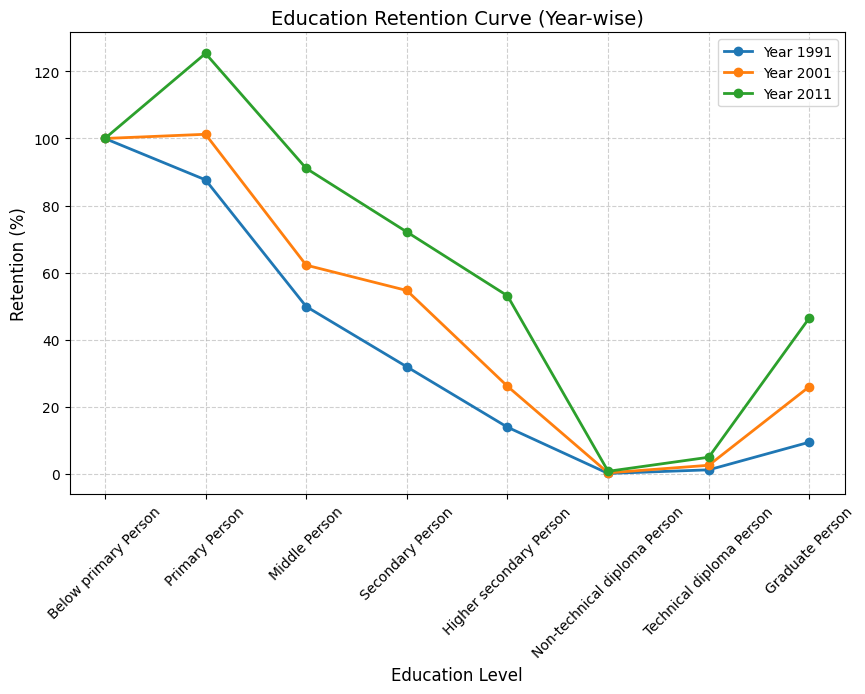

In [13]:
import matplotlib.pyplot as plt

# Define education stages in sequential order (use correct column names)
education_path = [
    "Below primary Person",
    "Primary Person",
    "Middle Person",
    "Secondary Person",
    "Higher secondary Person",
    "Non-technical diploma Person",
    "Technical diploma Person",
    "Graduate Person"
]

# Group by Year and sum for each stage
edu_counts_yearly = df.groupby("Year")[education_path].sum()

# Plot retention curve year-wise
plt.figure(figsize=(10,6))

for year, row in edu_counts_yearly.iterrows():
    retention = (row / row.iloc[0]) * 100   # retention relative to Below Primary
    plt.plot(education_path, retention, marker="o", linestyle="-", linewidth=2, label=f"Year {year}")

plt.title("Education Retention Curve (Year-wise)", fontsize=14)
plt.xlabel("Education Level", fontsize=12)
plt.ylabel("Retention (%)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.show()


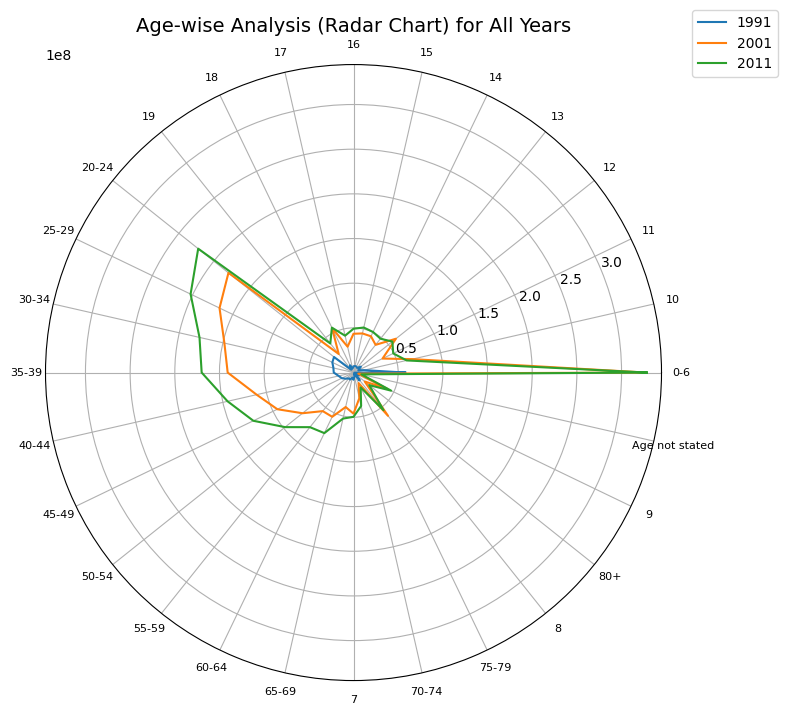

In [14]:

# Group by Age and Year (example: using Total Persons for analysis)
age_year_data = df.groupby(["Year", "Age"])["Total Person"].sum().unstack(fill_value=0)

# Prepare radar chart
ages = age_year_data.columns.tolist()
N = len(ages)

angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
angles += angles[:1]  # close the circle

plt.figure(figsize=(10, 8))

# Plot each year
for year in age_year_data.index:
    values = age_year_data.loc[year].tolist()
    values += values[:1]  # close the circle
    plt.polar(angles, values, label=str(year))

# Add labels
plt.xticks(angles[:-1], ages, fontsize=8)
plt.title("Age-wise Analysis (Radar Chart) for All Years", size=14)
plt.legend(loc="upper right", bbox_to_anchor=(1.2, 1.1))

plt.show()


<Figure size 1200x700 with 0 Axes>

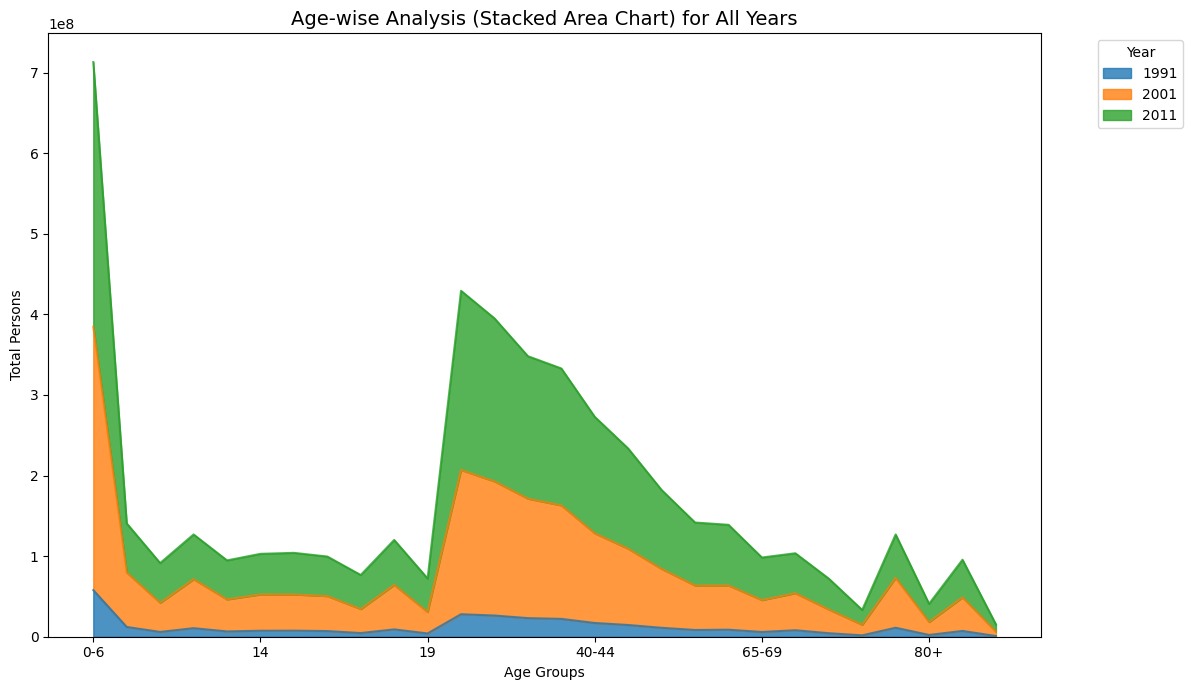

In [15]:

# Group by Age and Year (using Total Persons for analysis)
age_year_data = df.groupby(["Year", "Age"])["Total Person"].sum().unstack(fill_value=0)

# Plot stacked area chart
plt.figure(figsize=(12, 7))
age_year_data.T.plot.area(figsize=(12, 7), alpha=0.8)

plt.title("Age-wise Analysis (Stacked Area Chart) for All Years", fontsize=14)
plt.xlabel("Age Groups")
plt.ylabel("Total Persons")
plt.legend(title="Year", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


In [16]:


# Compute literacy rates
df["Male Literacy Rate"] = df["Literate Males"] / df["Total Males"]
df["Female Literacy Rate"] = df["Literate Females"] / df["Total Females"]

# Compute gender gap
df["Literacy Gap"] = df["Male Literacy Rate"] - df["Female Literacy Rate"]

# State-wise, Year-wise literacy gap
gap_summary = df.groupby(["State Name", "Year"])["Literacy Gap"].mean().reset_index()

# Year-wise fastest & slowest closers
yearly_gap_change = []
for year in sorted(gap_summary["Year"].unique()):
    temp = gap_summary[gap_summary["Year"] == year].sort_values("Literacy Gap")
    fastest = temp.head(5).assign(Category="Fastest (Lowest Gap)")
    slowest = temp.tail(5).assign(Category="Slowest (Highest Gap)")
    yearly_gap_change.append(pd.concat([fastest, slowest]))

yearly_gap_change = pd.concat(yearly_gap_change)

print("📊 Year-wise Fastest & Slowest States in Closing Gender Literacy Gap")
print(yearly_gap_change)



📊 Year-wise Fastest & Slowest States in Closing Gender Literacy Gap
              State Name  Year  Literacy Gap               Category
63               MIZORAM  1991      0.002591   Fastest (Lowest Gap)
48                KERALA  1991      0.086148   Fastest (Lowest Gap)
72                PUNJAB  1991      0.120736   Fastest (Lowest Gap)
78                SIKKIM  1991      0.137939   Fastest (Lowest Gap)
69           PONDICHERRY  1991      0.146354   Fastest (Lowest Gap)
3      ARUNACHAL PRADESH  1991      0.229842  Slowest (Highest Gap)
15          CHHATTISGARH  1991      0.233326  Slowest (Highest Gap)
66                ODISHA  1991      0.251912  Slowest (Highest Gap)
42             JHARKHAND  1991      0.253022  Slowest (Highest Gap)
75             RAJASTHAN  1991      0.286464  Slowest (Highest Gap)
49                KERALA  2001      0.062852   Fastest (Lowest Gap)
64               MIZORAM  2001      0.067151   Fastest (Lowest Gap)
61             MEGHALAYA  2001      0.072066   F

In [17]:


# Compute literacy rates
df["Total Literacy Rate"] = df["Literate Person"] / df["Total Person"]
df["Male Literacy Rate"] = df["Literate Males"] / df["Total Males"]
df["Female Literacy Rate"] = df["Literate Females"] / df["Total Females"]

# Filter only Rural and Urban areas
rural_urban = df[df["Area"].isin(["Rural", "Urban"])]

# Group by Year and Area
rural_urban_summary = rural_urban.groupby(["Year", "Area"])[
    ["Total Literacy Rate", "Male Literacy Rate", "Female Literacy Rate"]
].mean().reset_index()

print("📊 Rural vs Urban Literacy Summary (Year-wise)")
print(rural_urban_summary)


📊 Rural vs Urban Literacy Summary (Year-wise)
   Year   Area  Total Literacy Rate  Male Literacy Rate  Female Literacy Rate
0  1991  Rural             0.565485            0.657496              0.465458
1  1991  Urban             0.649432            0.735483              0.556986
2  2001  Rural             0.597059            0.688387              0.499851
3  2001  Urban             0.761566            0.824967              0.693611
4  2011  Rural             0.686593            0.756418              0.615222
5  2011  Urban             0.811323            0.857830              0.762976


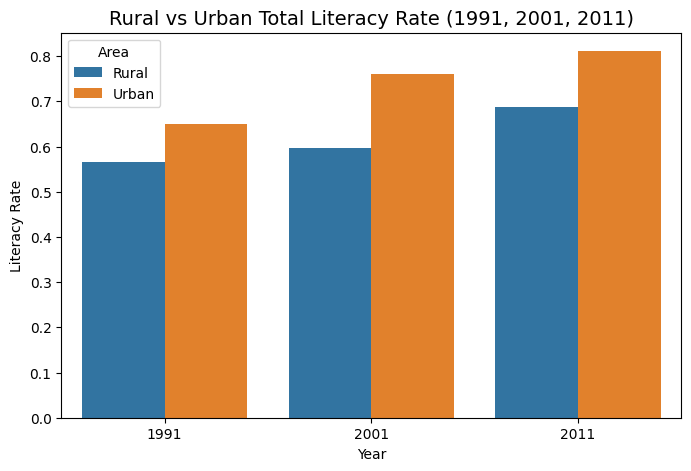

In [18]:
plt.figure(figsize=(8,5))
sns.barplot(data=rural_urban_summary, x="Year", y="Total Literacy Rate", hue="Area")
plt.title("Rural vs Urban Total Literacy Rate (1991, 2001, 2011)", fontsize=14)
plt.ylabel("Literacy Rate")
plt.show()


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import plotly.graph_objects as go

# Compute literacy rates
df["Total Literacy Rate"] = df["Literate Person"] / df["Total Person"]
df["Male Literacy Rate"] = df["Literate Males"] / df["Total Males"]
df["Female Literacy Rate"] = df["Literate Females"] / df["Total Females"]

# Keep only 'Total' area (ignore Rural/Urban)
df_total = df[df["Area"] == "Total"]

# Select required columns
df_total = df_total[["State Name", "Year", "Total Literacy Rate", "Male Literacy Rate", "Female Literacy Rate"]]

# --------------------
# 2. Clustering (Year-wise)
# --------------------
cluster_results = []

for year in [1991, 2001, 2011]:
    data_year = df_total[df_total["Year"] == year].copy()
    features = data_year[["Total Literacy Rate", "Male Literacy Rate", "Female Literacy Rate"]]

    # Standardize
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(features)

    # Find optimal clusters (Elbow + Silhouette)
    distortions = []
    silhouettes = []
    K = range(2, 8)
    for k in K:
        km = KMeans(n_clusters=k, random_state=42, n_init=10)
        km.fit(X_scaled)
        distortions.append(km.inertia_)
        silhouettes.append(silhouette_score(X_scaled, km.labels_))

    # Elbow plot
    plt.figure(figsize=(8,4))
    plt.plot(K, distortions, marker="o")
    plt.title(f"Elbow Method for {year}")
    plt.xlabel("Number of Clusters")
    plt.ylabel("Inertia")
    plt.show()

    # Silhouette plot
    plt.figure(figsize=(8,4))
    plt.plot(K, silhouettes, marker="o")
    plt.title(f"Silhouette Score for {year}")
    plt.xlabel("Number of Clusters")
    plt.ylabel("Score")
    plt.show()

    # Choose optimal k (manually, or take max silhouette)
    optimal_k = K[silhouettes.index(max(silhouettes))]
    print(f"✅ Optimal clusters for {year}: {optimal_k}")

    # Final KMeans
    kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
    data_year["Cluster"] = kmeans.fit_predict(X_scaled)

    cluster_results.append(data_year)

# Combine cluster assignments
clusters_all_years = pd.concat(cluster_results)

# --------------------
# 3. Cluster Stability (State-wise transitions)
# --------------------
cluster_pivot = clusters_all_years.pivot(index="State Name", columns="Year", values="Cluster")
print("\n📊 Cluster Membership by State & Year:")
print(cluster_pivot)

# --------------------
# 4. Visualization
# --------------------

# a) Scatterplot (Male vs Female Literacy, colored by cluster)
for year in [1991, 2001, 2011]:
    plt.figure(figsize=(7,5))
    temp = clusters_all_years[clusters_all_years["Year"] == year]
    sns.scatterplot(data=temp, x="Male Literacy Rate", y="Female Literacy Rate", hue="Cluster", palette="tab10", s=100)
    plt.title(f"Clusters of States by Literacy ({year})")
    plt.xlabel("Male Literacy Rate")
    plt.ylabel("Female Literacy Rate")
    plt.legend(title="Cluster")
    plt.show()

# b) Sankey Diagram (State transitions across clusters)
years = [1991, 2001, 2011]
labels = []
for y in years:
    labels.extend([f"{state}-{y}" for state in cluster_pivot.index])

# Map nodes
node_map = {label: i for i, label in enumerate(labels)}

sources, targets, values = [], [], []

for state in cluster_pivot.index:
    for i in range(len(years)-1):
        src = f"{state}-{years[i]}"
        tgt = f"{state}-{years[i+1]}"
        sources.append(node_map[src])
        targets.append(node_map[tgt])
        values.append(1)  # each state contributes one unit

fig = go.Figure(data=[go.Sankey(
    node=dict(pad=15, thickness=20, line=dict(color="black", width=0.5), label=labels),
    link=dict(source=sources, target=targets, value=values)
)])
fig.update_layout(title_text="State-wise Cluster Movement Across Decades", font_size=10)
fig.show()


ValueError: Input X contains NaN.
KMeans does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [20]:
print(df[["Total Literacy Rate", "Male Literacy Rate", "Female Literacy Rate"]].isna().sum())
print(df[["Total Literacy Rate", "Male Literacy Rate", "Female Literacy Rate"]].describe())


Total Literacy Rate     34
Male Literacy Rate      41
Female Literacy Rate    50
dtype: int64
       Total Literacy Rate  Male Literacy Rate  Female Literacy Rate
count          8030.000000         8023.000000           8014.000000
mean              0.670470            0.746280              0.590110
std               0.264993            0.233776              0.310103
min               0.000000            0.000000              0.000000
25%               0.495976            0.645381              0.327639
50%               0.750020            0.828571              0.674462
75%               0.890868            0.917862              0.867721
max               1.000000            1.000000              1.000000


In [ ]:
df.isna()